# Spanning Tree
Spanning Tree is a subgraph that connects all the nodes in the subgraph with the minimal number of edges possible. The minimum number of edges that form a spanning tree is n-1 where n is the number of nodes in the subgraph. A spanning tree does not have any cycles.

Properties of Spanning Tree
- All the nodes in the tree are connected
- Contains minimal number of edges
- The edges that form the tree does not form any cycles

# Minimum Spanning Tree
A minimum spanning tree is a spanning tree that has the minimal combined edge weights. The minimum spanning tree don't have to be unique.

We will introduce 2 algorithms to calculate the minimum spanning tree of a graph
- Prims Algorithm
- Kruskal's Algorithm

# Prims Algorithm
Prims Algorithm starts by visiting a single node and incrementally grows the minimum spanning tree one node at a time by performing a breadth first search for the next smallest weighted node that connects any nodes already in the tree with an unvisited node(frontier nodes). Repeat till we reached all reachable nodes.

## Algorithm
1. Pick a starting node

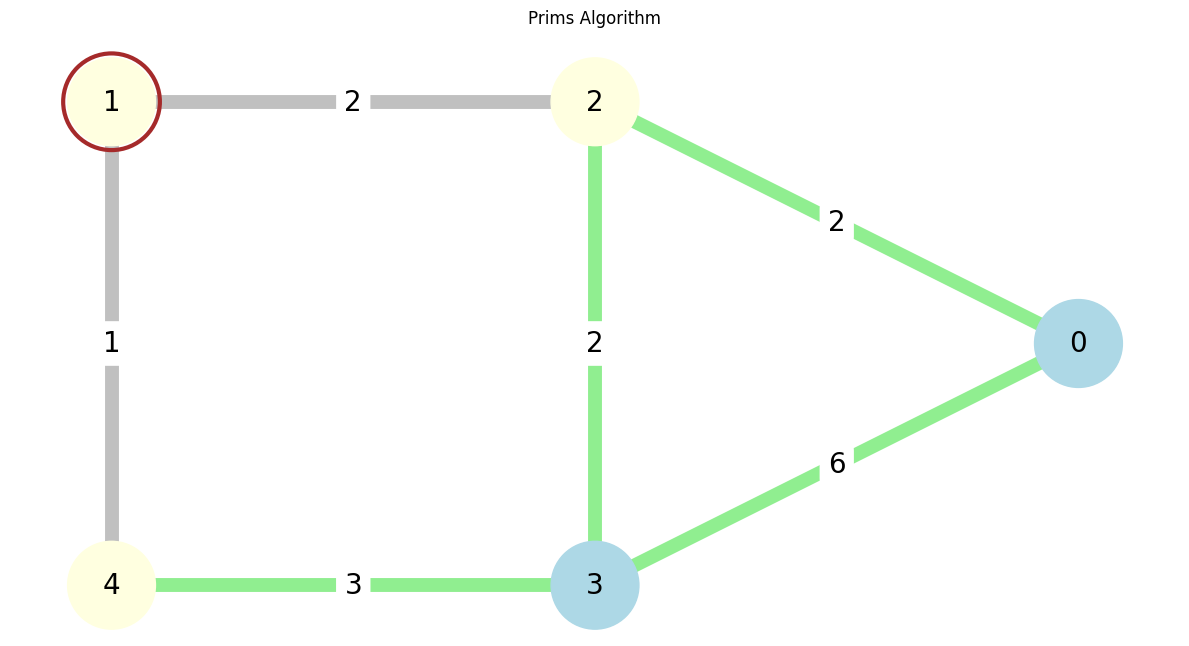

In [134]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create the graph
Prims = nx.Graph()

# Add nodes with color attributes
Prims.add_node(0, color='lightblue')
Prims.add_node(1, color='lightyellow')
Prims.add_node(2, color='lightyellow')
Prims.add_node(3, color='lightblue')
Prims.add_node(4, color='lightyellow')

# Add edges with labels
Prims.add_edge(1, 4, label='1', color="silver")
Prims.add_edge(1, 2, label='2', color="silver")
Prims.add_edge(4, 3, label='3', color="lightgreen")
Prims.add_edge(2, 3, label='2', color="lightgreen")
Prims.add_edge(2, 0, label='2', color="lightgreen")
Prims.add_edge(3, 0, label='6', color="lightgreen")

# Define the layout of the graph
pos = {
    0: (2, 0.5),   # Node 0
    1: (0, 1),   # Node 1
    2: (1, 1),  # Node 2
    3: (1, 0),    # Node 3
    4: (0, 0)    # Node 4
}

node_colors = [Prims.nodes[node]['color'] for node in Prims.nodes()]

# Draw edges with colors and width
edge_colors = [Prims.edges[edge]['color'] for edge in Prims.edges()]
edge_widths = [10 for edge in Prims.edges()]

# Draw the graph
fig, ax1 = plt.subplots(figsize=(12, 12))  # Adjust the figure size if needed
fig.subplots_adjust(top=0.9, bottom=0.1, right=0.9, left=0.1)  # Increased height from previously used values
nx.draw(Prims, pos=pos, ax=ax1, with_labels=False, node_color=node_colors, font_size=20, font_weight='bold', node_size=4000)

# Set the title with adjustment
ax1.set_title("Prims Algorithm", pad=20)

# Draw edge labels
edge_labels = nx.get_edge_attributes(Prims, 'label')
nx.draw_networkx_edges(Prims, pos, edgelist=Prims.edges(), edge_color=edge_colors, width=edge_widths, ax=ax1)
nx.draw_networkx_edge_labels(Prims, pos, edge_labels=edge_labels, ax=ax1, font_size=20, bbox=dict(facecolor="white", edgecolor="none", boxstyle="round,pad=0.3"), rotate=False)

# Draw custom node labels with distances
for node, (x, y) in pos.items():
    ax1.text(x, y, str(node), fontsize=20, ha='center', va='center')

# Add a brown circle around node 2
circle_radius = 0.1
circle = patches.Circle(pos[1], circle_radius, edgecolor='brown', facecolor='none', linewidth=3, zorder=10)
ax1.add_patch(circle)

# Set aspect to 'equal' to maintain the shape of the circle
ax1.set_aspect('equal')

# Show plot
plt.tight_layout()
plt.show()

2. Mark the selected node as visited, then find all the nodes that are reachable from the selected node

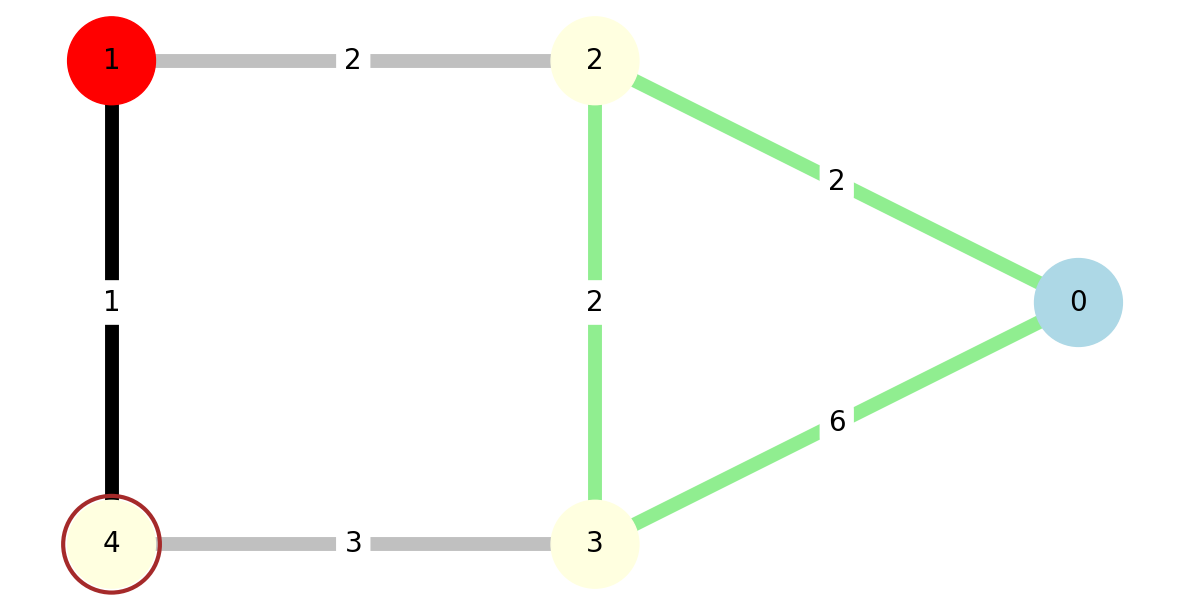

In [135]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create the graph
Prims = nx.Graph()

# Add nodes with color attributes
Prims.add_node(0, color='lightblue')
Prims.add_node(1, color='red')
Prims.add_node(2, color='lightyellow')
Prims.add_node(3, color='lightyellow')
Prims.add_node(4, color='lightyellow')

# Add edges with labels
Prims.add_edge(1, 4, label='1', color="black")
Prims.add_edge(1, 2, label='2', color="silver")
Prims.add_edge(4, 3, label='3', color="silver")
Prims.add_edge(2, 3, label='2', color="lightgreen")
Prims.add_edge(2, 0, label='2', color="lightgreen")
Prims.add_edge(3, 0, label='6', color="lightgreen")

# Define the layout of the graph
pos = {
    0: (2, 0.5),   # Node 0
    1: (0, 1),   # Node 1
    2: (1, 1),  # Node 2
    3: (1, 0),    # Node 3
    4: (0, 0)    # Node 4
}

node_colors = [Prims.nodes[node]['color'] for node in Prims.nodes()]

# Draw edges with colors and width
edge_colors = [Prims.edges[edge]['color'] for edge in Prims.edges()]
edge_widths = [10 for edge in Prims.edges()]


# Draw the graph
fig, ax1 = plt.subplots(figsize=(12, 12))  # Adjust the figure size if needed
fig.subplots_adjust(top=0.9, bottom=0.1, right=0.9, left=0.1)  # Increased height from previously used values
nx.draw(Prims, pos=pos, ax=ax1, with_labels=False, node_color=node_colors, font_size=20, font_weight='bold', node_size=4000)

# Draw edge labels
edge_labels = nx.get_edge_attributes(Prims, 'label')
nx.draw_networkx_edges(Prims, pos, edgelist=Prims.edges(), edge_color=edge_colors, width=edge_widths, ax=ax1)
nx.draw_networkx_edge_labels(Prims, pos, edge_labels=edge_labels, ax=ax1, font_size=20, bbox=dict(facecolor="white", edgecolor="none", boxstyle="round,pad=0.3"), rotate=False)

# Draw custom node labels with distances
for node, (x, y) in pos.items():
    ax1.text(x, y, str(node), fontsize=20, ha='center', va='center')

# # Add a brown circle around node
circle_radius = 0.1
circle = patches.Circle(pos[4], circle_radius, edgecolor='brown', facecolor='none', linewidth=3, zorder=10)
ax1.add_patch(circle)

# Set aspect to 'equal' to maintain the shape of the circle
ax1.set_aspect('equal')

# Show plot
plt.tight_layout()
plt.show()

3. Pick the smallest edge that is reached from an visited nodes and repeat step 2
4. Repeat till we run out of edges that can reach the unvisited nodes from the visited nodes.

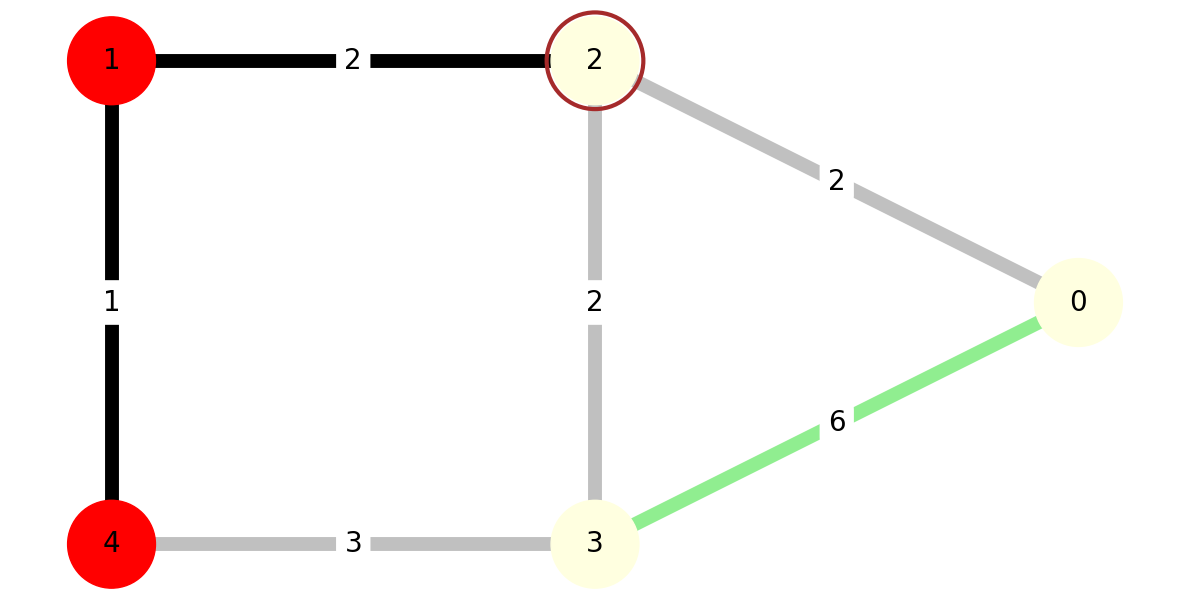

In [137]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create the graph
Prims = nx.Graph()

# Add nodes with color attributes
Prims.add_node(0, color='lightyellow')
Prims.add_node(1, color='red')
Prims.add_node(2, color='lightyellow')
Prims.add_node(3, color='lightyellow')
Prims.add_node(4, color='red')

# Add edges with labels
Prims.add_edge(1, 4, label='1', color="black")
Prims.add_edge(1, 2, label='2', color="black")
Prims.add_edge(4, 3, label='3', color="silver")
Prims.add_edge(2, 3, label='2', color="silver")
Prims.add_edge(2, 0, label='2', color="silver")
Prims.add_edge(3, 0, label='6', color="lightgreen")

# Define the layout of the graph
pos = {
    0: (2, 0.5),   # Node 0
    1: (0, 1),   # Node 1
    2: (1, 1),  # Node 2
    3: (1, 0),    # Node 3
    4: (0, 0)    # Node 4
}

node_colors = [Prims.nodes[node]['color'] for node in Prims.nodes()]

# Draw edges with colors and width
edge_colors = [Prims.edges[edge]['color'] for edge in Prims.edges()]
edge_widths = [10 for edge in Prims.edges()]


# Draw the graph
fig, ax1 = plt.subplots(figsize=(12, 12))  # Adjust the figure size if needed
fig.subplots_adjust(top=0.9, bottom=0.1, right=0.9, left=0.1)  # Increased height from previously used values
nx.draw(Prims, pos=pos, ax=ax1, with_labels=False, node_color=node_colors, font_size=20, font_weight='bold', node_size=4000)

# Draw edge labels
edge_labels = nx.get_edge_attributes(Prims, 'label')
nx.draw_networkx_edges(Prims, pos, edgelist=Prims.edges(), edge_color=edge_colors, width=edge_widths, ax=ax1)
nx.draw_networkx_edge_labels(Prims, pos, edge_labels=edge_labels, ax=ax1, font_size=20, bbox=dict(facecolor="white", edgecolor="none", boxstyle="round,pad=0.3"), rotate=False)

# Draw custom node labels with distances
for node, (x, y) in pos.items():
    ax1.text(x, y, str(node), fontsize=20, ha='center', va='center')

# # Add a brown circle around node
circle_radius = 0.1
circle = patches.Circle(pos[2], circle_radius, edgecolor='brown', facecolor='none', linewidth=3, zorder=10)
ax1.add_patch(circle)

# Set aspect to 'equal' to maintain the shape of the circle
ax1.set_aspect('equal')

# Show plot
plt.tight_layout()
plt.show()

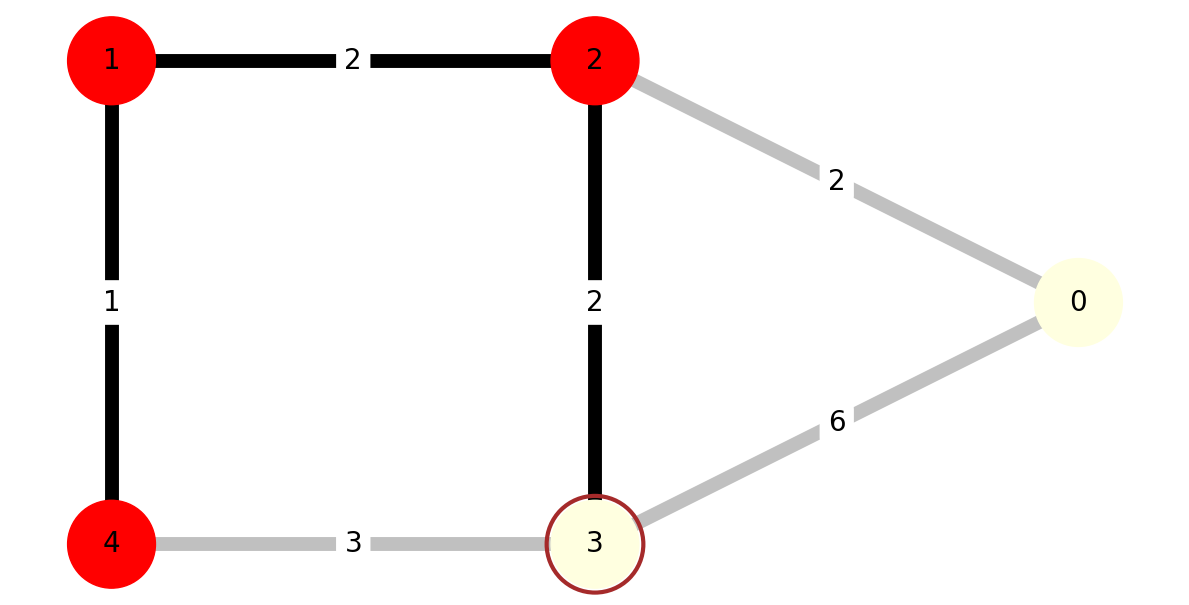

In [138]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create the graph
Prims = nx.Graph()

# Add nodes with color attributes
Prims.add_node(0, color='lightyellow')
Prims.add_node(1, color='red')
Prims.add_node(2, color='red')
Prims.add_node(3, color='lightyellow')
Prims.add_node(4, color='red')

# Add edges with labels
Prims.add_edge(1, 4, label='1', color="black")
Prims.add_edge(1, 2, label='2', color="black")
Prims.add_edge(4, 3, label='3', color="silver")
Prims.add_edge(2, 3, label='2', color="black")
Prims.add_edge(2, 0, label='2', color="silver")
Prims.add_edge(3, 0, label='6', color="silver")

# Define the layout of the graph
pos = {
    0: (2, 0.5),   # Node 0
    1: (0, 1),   # Node 1
    2: (1, 1),  # Node 2
    3: (1, 0),    # Node 3
    4: (0, 0)    # Node 4
}

node_colors = [Prims.nodes[node]['color'] for node in Prims.nodes()]

# Draw edges with colors and width
edge_colors = [Prims.edges[edge]['color'] for edge in Prims.edges()]
edge_widths = [10 for edge in Prims.edges()]


# Draw the graph
fig, ax1 = plt.subplots(figsize=(12, 12))  # Adjust the figure size if needed
fig.subplots_adjust(top=0.9, bottom=0.1, right=0.9, left=0.1)  # Increased height from previously used values
nx.draw(Prims, pos=pos, ax=ax1, with_labels=False, node_color=node_colors, font_size=20, font_weight='bold', node_size=4000)

# Draw edge labels
edge_labels = nx.get_edge_attributes(Prims, 'label')
nx.draw_networkx_edges(Prims, pos, edgelist=Prims.edges(), edge_color=edge_colors, width=edge_widths, ax=ax1)
nx.draw_networkx_edge_labels(Prims, pos, edge_labels=edge_labels, ax=ax1, font_size=20, bbox=dict(facecolor="white", edgecolor="none", boxstyle="round,pad=0.3"), rotate=False)

# Draw custom node labels with distances
for node, (x, y) in pos.items():
    ax1.text(x, y, str(node), fontsize=20, ha='center', va='center')

# # Add a brown circle around node
circle_radius = 0.1
circle = patches.Circle(pos[3], circle_radius, edgecolor='brown', facecolor='none', linewidth=3, zorder=10)
ax1.add_patch(circle)

# Set aspect to 'equal' to maintain the shape of the circle
ax1.set_aspect('equal')

# Show plot
plt.tight_layout()
plt.show()

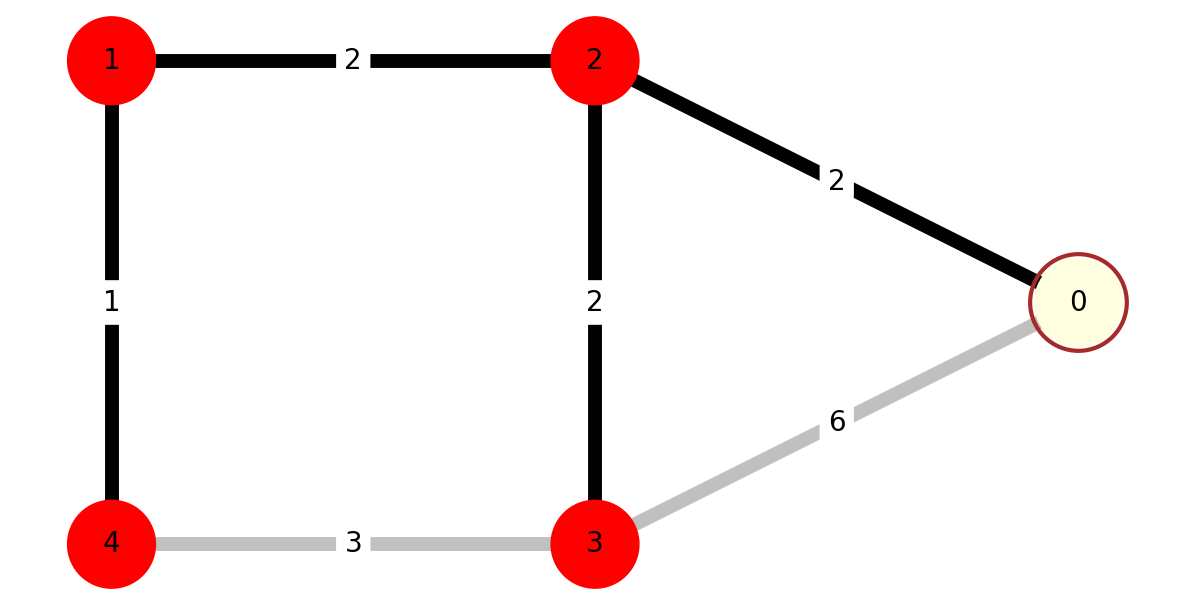

In [139]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create the graph
Prims = nx.Graph()

# Add nodes with color attributes
Prims.add_node(0, color='lightyellow')
Prims.add_node(1, color='red')
Prims.add_node(2, color='red')
Prims.add_node(3, color='red')
Prims.add_node(4, color='red')

# Add edges with labels
Prims.add_edge(1, 4, label='1', color="black")
Prims.add_edge(1, 2, label='2', color="black")
Prims.add_edge(4, 3, label='3', color="silver")
Prims.add_edge(2, 3, label='2', color="black")
Prims.add_edge(2, 0, label='2', color="black")
Prims.add_edge(3, 0, label='6', color="silver")

# Define the layout of the graph
pos = {
    0: (2, 0.5),   # Node 0
    1: (0, 1),   # Node 1
    2: (1, 1),  # Node 2
    3: (1, 0),    # Node 3
    4: (0, 0)    # Node 4
}

node_colors = [Prims.nodes[node]['color'] for node in Prims.nodes()]

# Draw edges with colors and width
edge_colors = [Prims.edges[edge]['color'] for edge in Prims.edges()]
edge_widths = [10 for edge in Prims.edges()]


# Draw the graph
fig, ax1 = plt.subplots(figsize=(12, 12))  # Adjust the figure size if needed
fig.subplots_adjust(top=0.9, bottom=0.1, right=0.9, left=0.1)  # Increased height from previously used values
nx.draw(Prims, pos=pos, ax=ax1, with_labels=False, node_color=node_colors, font_size=20, font_weight='bold', node_size=4000)

# Draw edge labels
edge_labels = nx.get_edge_attributes(Prims, 'label')
nx.draw_networkx_edges(Prims, pos, edgelist=Prims.edges(), edge_color=edge_colors, width=edge_widths, ax=ax1)
nx.draw_networkx_edge_labels(Prims, pos, edge_labels=edge_labels, ax=ax1, font_size=20, bbox=dict(facecolor="white", edgecolor="none", boxstyle="round,pad=0.3"), rotate=False)

# Draw custom node labels with distances
for node, (x, y) in pos.items():
    ax1.text(x, y, str(node), fontsize=20, ha='center', va='center')

# # Add a brown circle around node
circle_radius = 0.1
circle = patches.Circle(pos[0], circle_radius, edgecolor='brown', facecolor='none', linewidth=3, zorder=10)
ax1.add_patch(circle)

# Set aspect to 'equal' to maintain the shape of the circle
ax1.set_aspect('equal')

# Show plot
plt.tight_layout()
plt.show()

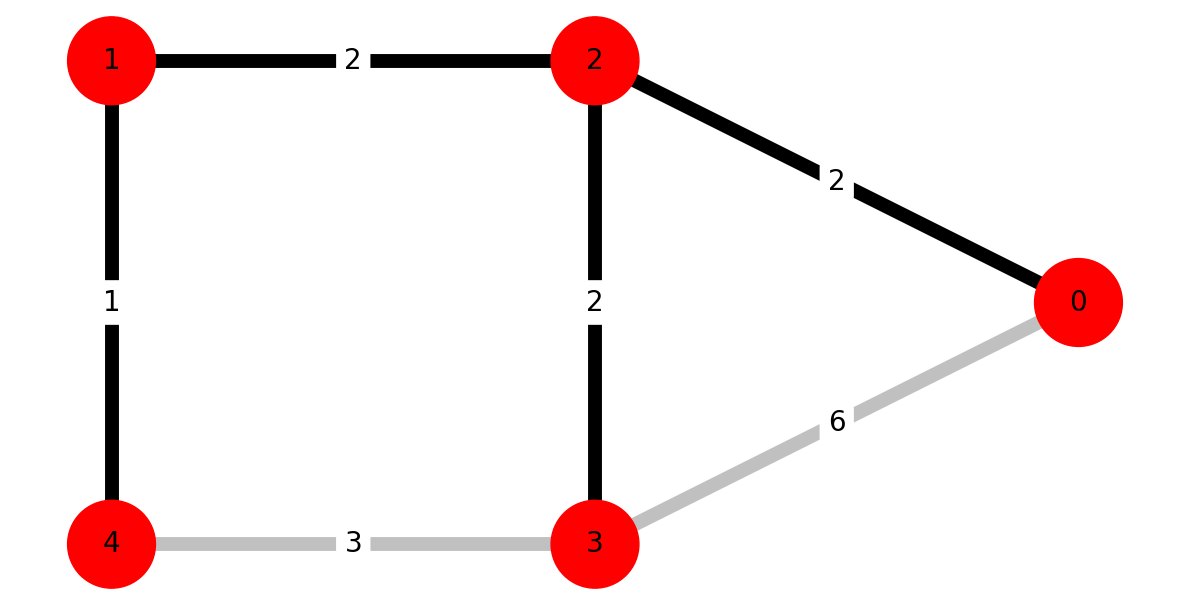

In [140]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create the graph
Prims = nx.Graph()

# Add nodes with color attributes
Prims.add_node(0, color='red')
Prims.add_node(1, color='red')
Prims.add_node(2, color='red')
Prims.add_node(3, color='red')
Prims.add_node(4, color='red')

# Add edges with labels
Prims.add_edge(1, 4, label='1', color="black")
Prims.add_edge(1, 2, label='2', color="black")
Prims.add_edge(4, 3, label='3', color="silver")
Prims.add_edge(2, 3, label='2', color="black")
Prims.add_edge(2, 0, label='2', color="black")
Prims.add_edge(3, 0, label='6', color="silver")

# Define the layout of the graph
pos = {
    0: (2, 0.5),   # Node 0
    1: (0, 1),   # Node 1
    2: (1, 1),  # Node 2
    3: (1, 0),    # Node 3
    4: (0, 0)    # Node 4
}

node_colors = [Prims.nodes[node]['color'] for node in Prims.nodes()]

# Draw edges with colors and width
edge_colors = [Prims.edges[edge]['color'] for edge in Prims.edges()]
edge_widths = [10 for edge in Prims.edges()]


# Draw the graph
fig, ax1 = plt.subplots(figsize=(12, 12))  # Adjust the figure size if needed
fig.subplots_adjust(top=0.9, bottom=0.1, right=0.9, left=0.1)  # Increased height from previously used values
nx.draw(Prims, pos=pos, ax=ax1, with_labels=False, node_color=node_colors, font_size=20, font_weight='bold', node_size=4000)

# Draw edge labels
edge_labels = nx.get_edge_attributes(Prims, 'label')
nx.draw_networkx_edges(Prims, pos, edgelist=Prims.edges(), edge_color=edge_colors, width=edge_widths, ax=ax1)
nx.draw_networkx_edge_labels(Prims, pos, edge_labels=edge_labels, ax=ax1, font_size=20, bbox=dict(facecolor="white", edgecolor="none", boxstyle="round,pad=0.3"), rotate=False)

# Draw custom node labels with distances
for node, (x, y) in pos.items():
    ax1.text(x, y, str(node), fontsize=20, ha='center', va='center')

# # Add a brown circle around node
# circle_radius = 0.1
# circle = patches.Circle(pos[0], circle_radius, edgecolor='brown', facecolor='none', linewidth=3, zorder=10)
# ax1.add_patch(circle)

# Set aspect to 'equal' to maintain the shape of the circle
ax1.set_aspect('equal')

# Show plot
plt.tight_layout()
plt.show()

Note! If the size of our tree is less than the number of nodes the tree is not fully connected.

In [80]:
from typing import Union, List, Tuple, Dict
from collections import defaultdict
import heapq

Node = Union[int, str]

class Prims:
    def __init__(self, edges: List[Tuple[Node, Node, int]]) -> None:
        self.adjacent_map = self.__initialize_adjacent_map(edges)

    def __initialize_adjacent_map(self, edges: List[Tuple[Node, Node, int]]) -> Dict[Node, List[Tuple[Node, int]]]:
        adjacent_map = defaultdict(list)
        for node1, node2, weight in edges:
            adjacent_map[node1].append((weight, node2))
            adjacent_map[node2].append((weight, node1))  # Assuming the graph is undirected
        return dict(adjacent_map)

    def find_minimum_weight(self, start_node: Node) -> int:
        # This method would implement Prims's algorithm to find the
        # sum of the weights of a minimum spanning tree. 
        # This method takes a starting node return a integer representing the sum of the weight of the mst.
        if start_node not in self.adjacent_map:
            raise ValueError("Node doees not exist in tree")
        
        min_heap = []
        visited = set()
        min_distance = 0
        
        heapq.heappush(min_heap, (0, start_node))

        while min_heap:
            current_node_distance, current_node = heapq.heappop(min_heap)
            if current_node not in visited:
                visited.add(current_node)
                min_distance += current_node_distance
                for adjacent_node_edge_length, adjacent_node in self.adjacent_map[current_node]:
                    if adjacent_node not in visited:
                        heapq.heappush(min_heap, (adjacent_node_edge_length, adjacent_node))

        if len(visited) != len(self.adjacent_map):
            raise ValueError("Tree is not fully connected.")
        return min_distance

In [81]:
edges = [
    (0,2,2),
    (3,0,6),
    (2,1,5),
    (4,1,1),
    (3,2,2),
    (4,3,3)
]
prims = Prims(edges)

# Difference between Prims and Dijkstra
The Dijkstra and Prims algorithm look similar, because they both perform breadth first search and select the minimum distances of unvisited nodes. Lets look at the difference between them.

- Prims Algorithm: Used to find the minimum spanning tree (MST) in a weighted, undirected graph. It starts from any node and expands the tree by adding the nearest unvisited node at each step, ensuring all nodes are connected with the minimum possible total edge weight.
- Dijkstra Algorithm: Used to find the shortest path from a single source to all other nodes in a graph with non-negative weights. It calculates the shortest path by continuously updating the cumulative cost to reach each node from the source, selecting the node with the smallest known distance at each step.

Distance Calculation:
- Prims: The distance tracked for each node is the minimum edge weight by which it can be connected to the growing MST. It only considers the weight of the connecting edge from the MST to a new node.
- Dijkstra: The distance for each node is the sum of the weights from the source node along the shortest path found so far. It accumulates total path weights from the source to each node.

Prims algorithm gives the tree where all the nodes are connected and the sum of the weights of the edges that connect the node is minimum.

Dijkstra provide the shortest route from the source to each node.

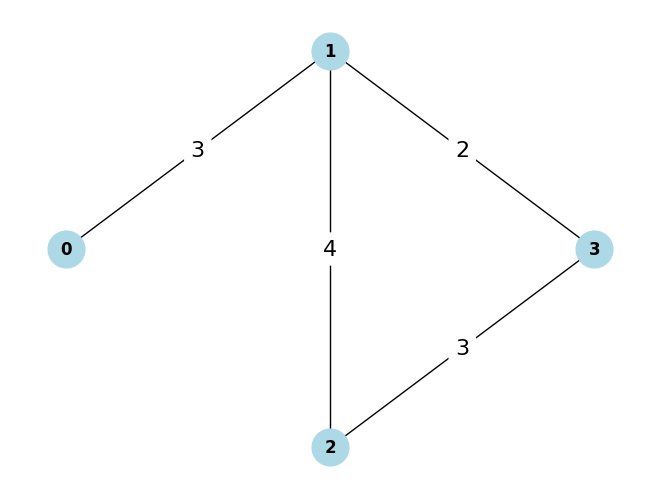

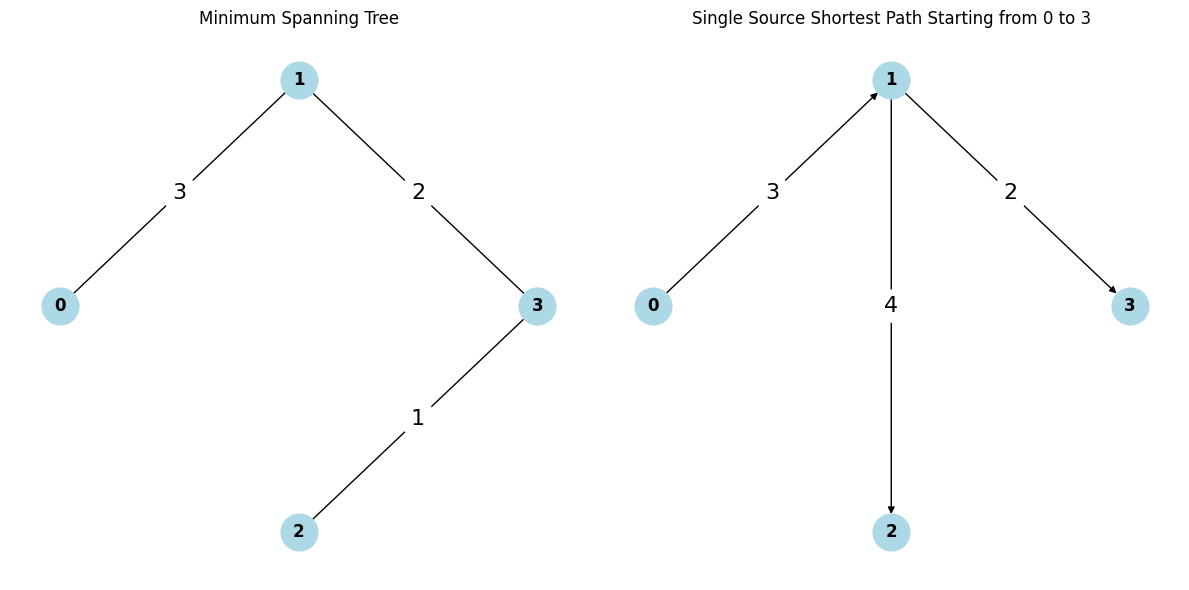

In [52]:
Tree = nx.Graph()

Tree.add_node(0)
Tree.add_node(1)
Tree.add_node(2)
Tree.add_node(3)

Tree.add_edge(0, 1, label='3')
Tree.add_edge(1, 2, label='4')
Tree.add_edge(1, 3, label='2')
Tree.add_edge(2, 3, label='3')

pos = {
    0: (-1, 0),  # Node 5 at the top
    1: (0, 1), # Other nodes arranged around node 5
    2: (0, -1),
    3: (1, 0)
}

nx.draw(Tree, pos=pos, with_labels=True, node_color='lightblue', font_weight='bold', node_size=700)
edge_labels = nx.get_edge_attributes(Tree, 'label')
nx.draw_networkx_edge_labels(Tree, pos, edge_labels=edge_labels, font_size=16, rotate=False, bbox=dict(facecolor="white", edgecolor="none", boxstyle="round,pad=0.3"))

plt.show()

MinimumSpanningTree = nx.Graph()

MinimumSpanningTree.add_node(0)
MinimumSpanningTree.add_node(1)
MinimumSpanningTree.add_node(2)
MinimumSpanningTree.add_node(3)

MinimumSpanningTree.add_edge(0, 1, label='3')
MinimumSpanningTree.add_edge(1, 3, label='2')
MinimumSpanningTree.add_edge(3, 2, label='1')

SingleSourceShortestPath = nx.DiGraph()

SingleSourceShortestPath.add_node(0)
SingleSourceShortestPath.add_node(1)
SingleSourceShortestPath.add_node(2)
SingleSourceShortestPath.add_node(3)

SingleSourceShortestPath.add_edge(0, 1, label='3')
SingleSourceShortestPath.add_edge(1, 3, label='2')
SingleSourceShortestPath.add_edge(1, 2, label='4')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))


nx.draw(MinimumSpanningTree, pos, ax=ax1, with_labels=True, node_color='lightblue', font_weight='bold', node_size=700)
ax1.set_title("Minimum Spanning Tree")
edge_labels = nx.get_edge_attributes(MinimumSpanningTree, 'label')
nx.draw_networkx_edge_labels(MinimumSpanningTree, pos, edge_labels=edge_labels, ax=ax1, font_size=16, rotate=False, bbox=dict(facecolor="white", edgecolor="none", boxstyle="round,pad=0.3"))

nx.draw(SingleSourceShortestPath, pos, ax=ax2, with_labels=True, node_color='lightblue', font_weight='bold', node_size=700)
ax2.set_title("Single Source Shortest Path Starting from 0 to 3")
edge_labels = nx.get_edge_attributes(SingleSourceShortestPath, 'label')
nx.draw_networkx_edge_labels(SingleSourceShortestPath, pos, edge_labels=edge_labels, ax=ax2, font_size=16, rotate=False, bbox=dict(facecolor="white", edgecolor="none", boxstyle="round,pad=0.3"))

plt.tight_layout()
plt.show()

# Kruskal's Algorithm
Kruskal's algorithm starts by sorting all the edges by increasing weights. It then builds the minimum spanning tree by adding the edge one by one if adding the edge does not form a cycle. We continue this process till all the nodes are connected or when we run out of edges

## Intuition
The core idea behind Kruskal's algorithm is to build the MST by selecting the edges in ascending order of their weights, ensuring that no cycles are formed. By starting with the smallest edges, Kruskal's ensures that the MST includes edges that contribute to minimizing the overall tree weight without closing any loops.

## Algorithm
1. Sort all edges in the graph.
2. Start with the edge with the lowest weight.
3. Add minimum weight edge to the existing tree t oensure there is no cycles.
4. Repeat step 2.

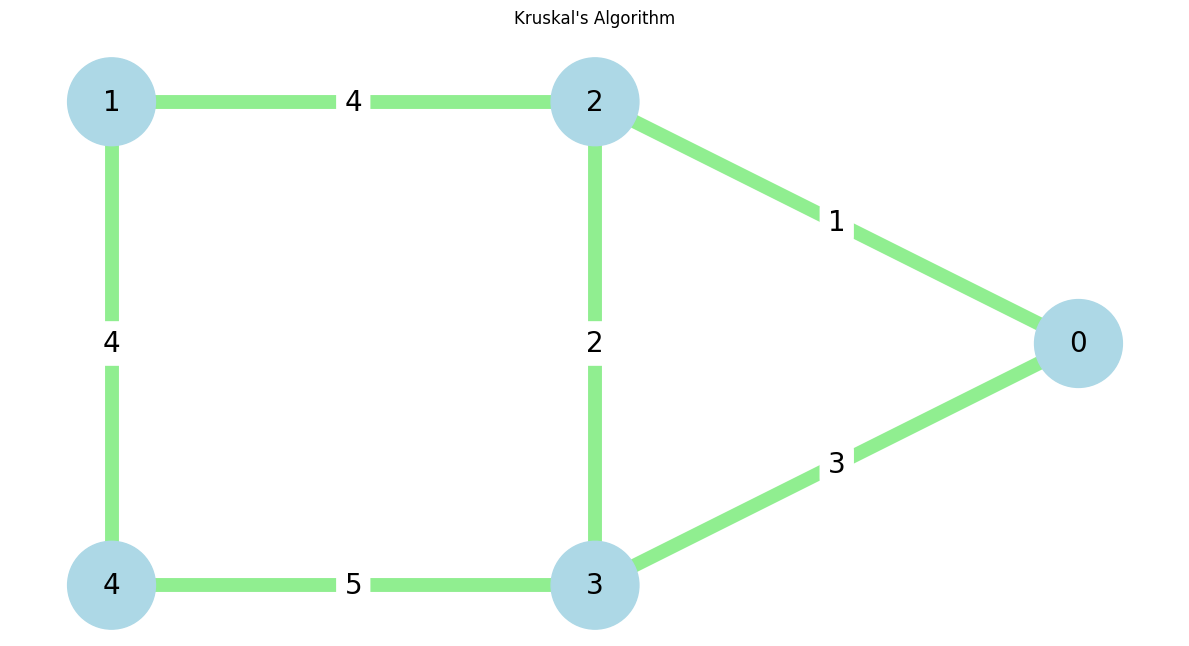

In [142]:
Kruskal = nx.Graph()

# Add nodes with color attributes
Kruskal.add_node(0, color='lightblue')
Kruskal.add_node(1, color='lightblue')
Kruskal.add_node(2, color='lightblue')
Kruskal.add_node(3, color='lightblue')
Kruskal.add_node(4, color='lightblue')

# Add edges with labels
Kruskal.add_edge(1, 4, label='4', color="lightgreen")
Kruskal.add_edge(1, 2, label='4', color="lightgreen")
Kruskal.add_edge(4, 3, label='5', color="lightgreen")
Kruskal.add_edge(2, 3, label='2', color="lightgreen")
Kruskal.add_edge(2, 0, label='1', color="lightgreen")
Kruskal.add_edge(3, 0, label='3', color="lightgreen")

# Define the layout of the graph
pos = {
    0: (2, 0.5),   # Node 0
    1: (0, 1),   # Node 1
    2: (1, 1),  # Node 2
    3: (1, 0),    # Node 3
    4: (0, 0)    # Node 4
}

node_colors = [Kruskal.nodes[node]['color'] for node in Kruskal.nodes()]

# Draw edges with colors and width
edge_colors = [Kruskal.edges[edge]['color'] for edge in Kruskal.edges()]
edge_widths = [10 for edge in Kruskal.edges()]

# Draw the graph
fig, ax1 = plt.subplots(figsize=(12, 12))  # Adjust the figure size if needed
fig.subplots_adjust(top=0.9, bottom=0.1, right=0.9, left=0.1)  # Increased height from previously used values
nx.draw(Kruskal, pos=pos, ax=ax1, with_labels=False, node_color=node_colors, font_size=20, font_weight='bold', node_size=4000)

# Set the title with adjustment
ax1.set_title("Kruskal's Algorithm", pad=20)

# Draw edge labels
edge_labels = nx.get_edge_attributes(Kruskal, 'label')
nx.draw_networkx_edges(Kruskal, pos, edgelist=Kruskal.edges(), edge_color=edge_colors, width=edge_widths, ax=ax1)
nx.draw_networkx_edge_labels(Kruskal, pos, edge_labels=edge_labels, ax=ax1, font_size=20, bbox=dict(facecolor="white", edgecolor="none", boxstyle="round,pad=0.3"), rotate=False)

# Draw custom node labels with distances
for node, (x, y) in pos.items():
    ax1.text(x, y, str(node), fontsize=20, ha='center', va='center')


# Set aspect to 'equal' to maintain the shape of the circle
ax1.set_aspect('equal')

# Show plot
plt.tight_layout()
plt.show()

Sorted Edges
|Node|Node|Weight|
|--|--|--|
|Node 2|Node 1|1 <-----|
|Node 2|Node 3|2|
|Node 3|Node 0|3|
|Node 1|Node 4|4|
|Node 1|Node 2|4|
|Node 4|Node 3|5|

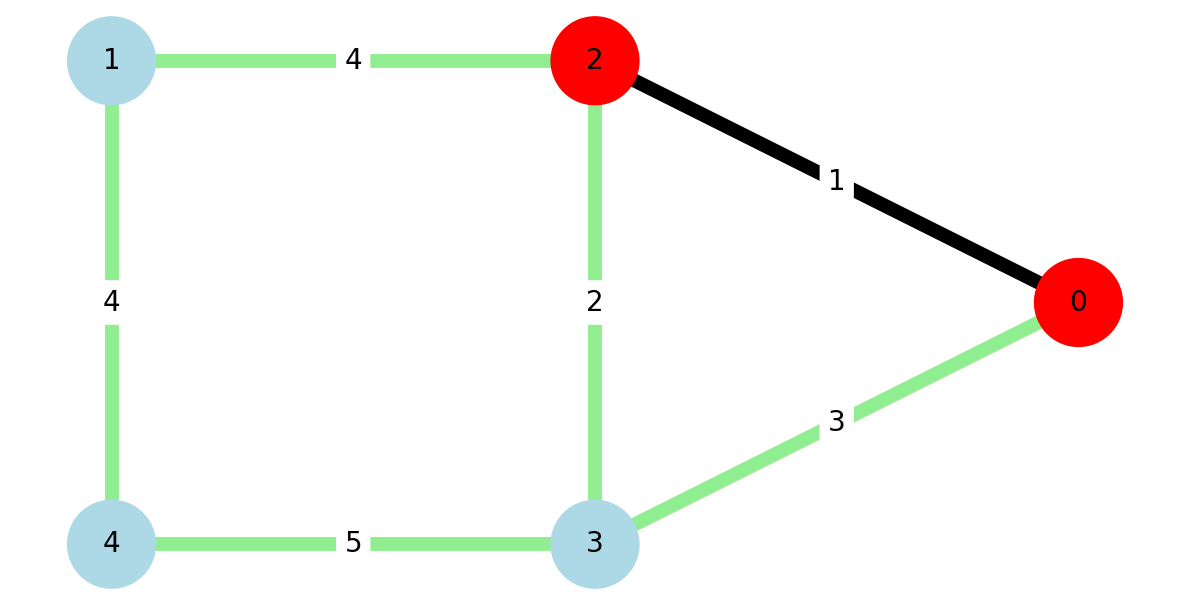

In [143]:
Kruskal = nx.Graph()

# Add nodes with color attributes
Kruskal.add_node(0, color='red')
Kruskal.add_node(1, color='lightblue')
Kruskal.add_node(2, color='red')
Kruskal.add_node(3, color='lightblue')
Kruskal.add_node(4, color='lightblue')

# Add edges with labels
Kruskal.add_edge(1, 4, label='4', color="lightgreen")
Kruskal.add_edge(1, 2, label='4', color="lightgreen")
Kruskal.add_edge(4, 3, label='5', color="lightgreen")
Kruskal.add_edge(2, 3, label='2', color="lightgreen")
Kruskal.add_edge(2, 0, label='1', color="black")
Kruskal.add_edge(3, 0, label='3', color="lightgreen")

# Define the layout of the graph
pos = {
    0: (2, 0.5),   # Node 0
    1: (0, 1),   # Node 1
    2: (1, 1),  # Node 2
    3: (1, 0),    # Node 3
    4: (0, 0)    # Node 4
}

node_colors = [Kruskal.nodes[node]['color'] for node in Kruskal.nodes()]

# Draw edges with colors and width
edge_colors = [Kruskal.edges[edge]['color'] for edge in Kruskal.edges()]
edge_widths = [10 for edge in Kruskal.edges()]

# Draw the graph
fig, ax1 = plt.subplots(figsize=(12, 12))  # Adjust the figure size if needed
fig.subplots_adjust(top=0.9, bottom=0.1, right=0.9, left=0.1)  # Increased height from previously used values
nx.draw(Kruskal, pos=pos, ax=ax1, with_labels=False, node_color=node_colors, font_size=20, font_weight='bold', node_size=4000)

# Draw edge labels
edge_labels = nx.get_edge_attributes(Kruskal, 'label')
nx.draw_networkx_edges(Kruskal, pos, edgelist=Kruskal.edges(), edge_color=edge_colors, width=edge_widths, ax=ax1)
nx.draw_networkx_edge_labels(Kruskal, pos, edge_labels=edge_labels, ax=ax1, font_size=20, bbox=dict(facecolor="white", edgecolor="none", boxstyle="round,pad=0.3"), rotate=False)

# Draw custom node labels with distances
for node, (x, y) in pos.items():
    ax1.text(x, y, str(node), fontsize=20, ha='center', va='center')


# Set aspect to 'equal' to maintain the shape of the circle
ax1.set_aspect('equal')

# Show plot
plt.tight_layout()
plt.show()

Sorted Edges
|Node|Node|Weight|
|--|--|--|
|Node 2|Node 1|1|
|Node 2|Node 3|2 <----|
|Node 3|Node 0|3|
|Node 1|Node 4|4|
|Node 1|Node 2|4|
|Node 4|Node 3|5|

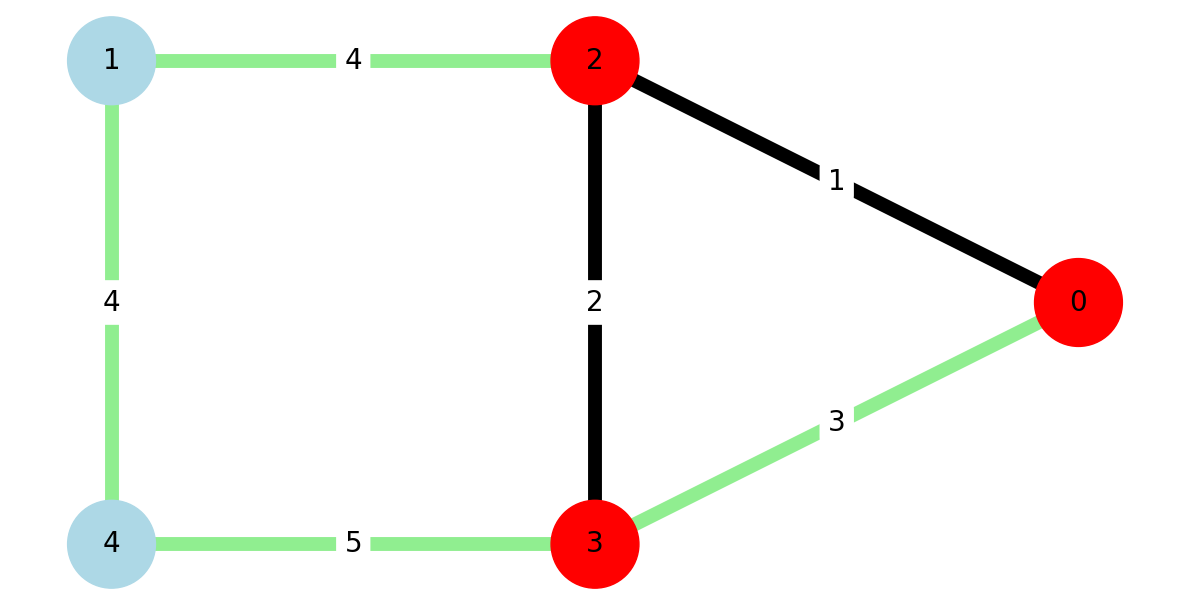

In [145]:
Kruskal = nx.Graph()

# Add nodes with color attributes
Kruskal.add_node(0, color='red')
Kruskal.add_node(1, color='lightblue')
Kruskal.add_node(2, color='red')
Kruskal.add_node(3, color='red')
Kruskal.add_node(4, color='lightblue')

# Add edges with labels
Kruskal.add_edge(1, 4, label='4', color="lightgreen")
Kruskal.add_edge(1, 2, label='4', color="lightgreen")
Kruskal.add_edge(4, 3, label='5', color="lightgreen")
Kruskal.add_edge(2, 3, label='2', color="black")
Kruskal.add_edge(2, 0, label='1', color="black")
Kruskal.add_edge(3, 0, label='3', color="lightgreen")

# Define the layout of the graph
pos = {
    0: (2, 0.5),   # Node 0
    1: (0, 1),   # Node 1
    2: (1, 1),  # Node 2
    3: (1, 0),    # Node 3
    4: (0, 0)    # Node 4
}

node_colors = [Kruskal.nodes[node]['color'] for node in Kruskal.nodes()]

# Draw edges with colors and width
edge_colors = [Kruskal.edges[edge]['color'] for edge in Kruskal.edges()]
edge_widths = [10 for edge in Kruskal.edges()]

# Draw the graph
fig, ax1 = plt.subplots(figsize=(12, 12))  # Adjust the figure size if needed
fig.subplots_adjust(top=0.9, bottom=0.1, right=0.9, left=0.1)  # Increased height from previously used values
nx.draw(Kruskal, pos=pos, ax=ax1, with_labels=False, node_color=node_colors, font_size=20, font_weight='bold', node_size=4000)

# Draw edge labels
edge_labels = nx.get_edge_attributes(Kruskal, 'label')
nx.draw_networkx_edges(Kruskal, pos, edgelist=Kruskal.edges(), edge_color=edge_colors, width=edge_widths, ax=ax1)
nx.draw_networkx_edge_labels(Kruskal, pos, edge_labels=edge_labels, ax=ax1, font_size=20, bbox=dict(facecolor="white", edgecolor="none", boxstyle="round,pad=0.3"), rotate=False)

# Draw custom node labels with distances
for node, (x, y) in pos.items():
    ax1.text(x, y, str(node), fontsize=20, ha='center', va='center')


# Set aspect to 'equal' to maintain the shape of the circle
ax1.set_aspect('equal')

# Show plot
plt.tight_layout()
plt.show()

Sorted Edges
|Node|Node|Weight|
|--|--|--|
|Node 2|Node 1|1|
|Node 2|Node 3|2|
|Node 3|Node 0|3 <----|
|Node 1|Node 4|4|
|Node 1|Node 2|4|
|Node 4|Node 3|5|

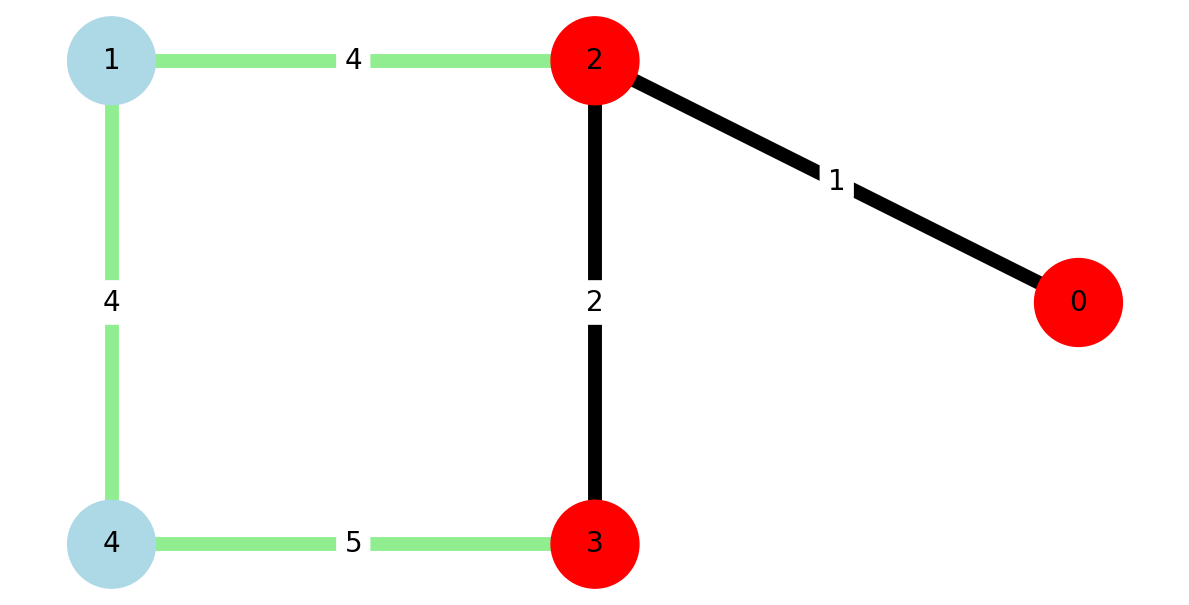

In [146]:
Kruskal = nx.Graph()

# Add nodes with color attributes
Kruskal.add_node(0, color='red')
Kruskal.add_node(1, color='lightblue')
Kruskal.add_node(2, color='red')
Kruskal.add_node(3, color='red')
Kruskal.add_node(4, color='lightblue')

# Add edges with labels
Kruskal.add_edge(1, 4, label='4', color="lightgreen")
Kruskal.add_edge(1, 2, label='4', color="lightgreen")
Kruskal.add_edge(4, 3, label='5', color="lightgreen")
Kruskal.add_edge(2, 3, label='2', color="black")
Kruskal.add_edge(2, 0, label='1', color="black")

# Define the layout of the graph
pos = {
    0: (2, 0.5),   # Node 0
    1: (0, 1),   # Node 1
    2: (1, 1),  # Node 2
    3: (1, 0),    # Node 3
    4: (0, 0)    # Node 4
}

node_colors = [Kruskal.nodes[node]['color'] for node in Kruskal.nodes()]

# Draw edges with colors and width
edge_colors = [Kruskal.edges[edge]['color'] for edge in Kruskal.edges()]
edge_widths = [10 for edge in Kruskal.edges()]

# Draw the graph
fig, ax1 = plt.subplots(figsize=(12, 12))  # Adjust the figure size if needed
fig.subplots_adjust(top=0.9, bottom=0.1, right=0.9, left=0.1)  # Increased height from previously used values
nx.draw(Kruskal, pos=pos, ax=ax1, with_labels=False, node_color=node_colors, font_size=20, font_weight='bold', node_size=4000)

# Draw edge labels
edge_labels = nx.get_edge_attributes(Kruskal, 'label')
nx.draw_networkx_edges(Kruskal, pos, edgelist=Kruskal.edges(), edge_color=edge_colors, width=edge_widths, ax=ax1)
nx.draw_networkx_edge_labels(Kruskal, pos, edge_labels=edge_labels, ax=ax1, font_size=20, bbox=dict(facecolor="white", edgecolor="none", boxstyle="round,pad=0.3"), rotate=False)

# Draw custom node labels with distances
for node, (x, y) in pos.items():
    ax1.text(x, y, str(node), fontsize=20, ha='center', va='center')


# Set aspect to 'equal' to maintain the shape of the circle
ax1.set_aspect('equal')

# Show plot
plt.tight_layout()
plt.show()

Cycle detected when adding edge (Node 3, Node 0)

Sorted Edges
|Node|Node|Weight|
|--|--|--|
|Node 2|Node 1|1|
|Node 2|Node 3|2|
|Node 3|Node 0|3|
|Node 1|Node 4|4 <----|
|Node 1|Node 2|4|
|Node 4|Node 3|5|

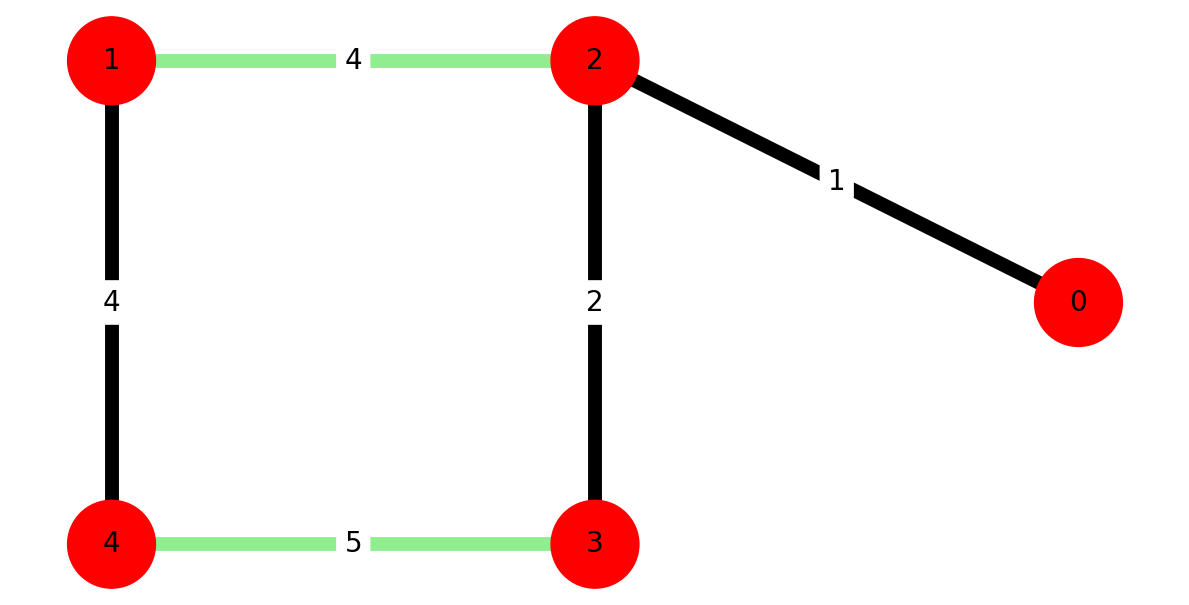

In [148]:
Kruskal = nx.Graph()

# Add nodes with color attributes
Kruskal.add_node(0, color='red')
Kruskal.add_node(1, color='red')
Kruskal.add_node(2, color='red')
Kruskal.add_node(3, color='red')
Kruskal.add_node(4, color='red')

# Add edges with labels
Kruskal.add_edge(1, 4, label='4', color="black")
Kruskal.add_edge(1, 2, label='4', color="lightgreen")
Kruskal.add_edge(4, 3, label='5', color="lightgreen")
Kruskal.add_edge(2, 3, label='2', color="black")
Kruskal.add_edge(2, 0, label='1', color="black")

# Define the layout of the graph
pos = {
    0: (2, 0.5),   # Node 0
    1: (0, 1),   # Node 1
    2: (1, 1),  # Node 2
    3: (1, 0),    # Node 3
    4: (0, 0)    # Node 4
}

node_colors = [Kruskal.nodes[node]['color'] for node in Kruskal.nodes()]

# Draw edges with colors and width
edge_colors = [Kruskal.edges[edge]['color'] for edge in Kruskal.edges()]
edge_widths = [10 for edge in Kruskal.edges()]

# Draw the graph
fig, ax1 = plt.subplots(figsize=(12, 12))  # Adjust the figure size if needed
fig.subplots_adjust(top=0.9, bottom=0.1, right=0.9, left=0.1)  # Increased height from previously used values
nx.draw(Kruskal, pos=pos, ax=ax1, with_labels=False, node_color=node_colors, font_size=20, font_weight='bold', node_size=4000)

# Draw edge labels
edge_labels = nx.get_edge_attributes(Kruskal, 'label')
nx.draw_networkx_edges(Kruskal, pos, edgelist=Kruskal.edges(), edge_color=edge_colors, width=edge_widths, ax=ax1)
nx.draw_networkx_edge_labels(Kruskal, pos, edge_labels=edge_labels, ax=ax1, font_size=20, bbox=dict(facecolor="white", edgecolor="none", boxstyle="round,pad=0.3"), rotate=False)

# Draw custom node labels with distances
for node, (x, y) in pos.items():
    ax1.text(x, y, str(node), fontsize=20, ha='center', va='center')


# Set aspect to 'equal' to maintain the shape of the circle
ax1.set_aspect('equal')

# Show plot
plt.tight_layout()
plt.show()

Sorted Edges
|Node|Node|Weight|
|--|--|--|
|Node 2|Node 1|1|
|Node 2|Node 3|2|
|Node 3|Node 0|3|
|Node 1|Node 4|4|
|Node 1|Node 2|4 <----|
|Node 4|Node 3|5|

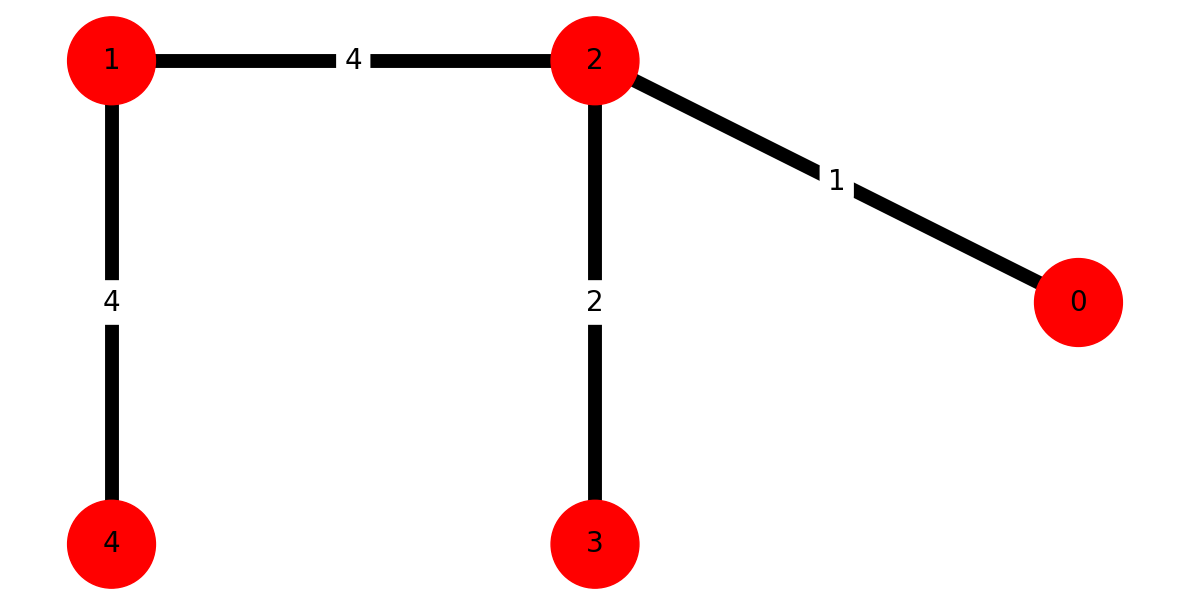

In [151]:
Kruskal = nx.Graph()

# Add nodes with color attributes
Kruskal.add_node(0, color='red')
Kruskal.add_node(1, color='red')
Kruskal.add_node(2, color='red')
Kruskal.add_node(3, color='red')
Kruskal.add_node(4, color='red')

# Add edges with labels
Kruskal.add_edge(1, 4, label='4', color="black")
Kruskal.add_edge(1, 2, label='4', color="black")
Kruskal.add_edge(2, 3, label='2', color="black")
Kruskal.add_edge(2, 0, label='1', color="black")

# Define the layout of the graph
pos = {
    0: (2, 0.5),   # Node 0
    1: (0, 1),   # Node 1
    2: (1, 1),  # Node 2
    3: (1, 0),    # Node 3
    4: (0, 0)    # Node 4
}

node_colors = [Kruskal.nodes[node]['color'] for node in Kruskal.nodes()]

# Draw edges with colors and width
edge_colors = [Kruskal.edges[edge]['color'] for edge in Kruskal.edges()]
edge_widths = [10 for edge in Kruskal.edges()]

# Draw the graph
fig, ax1 = plt.subplots(figsize=(12, 12))  # Adjust the figure size if needed
fig.subplots_adjust(top=0.9, bottom=0.1, right=0.9, left=0.1)  # Increased height from previously used values
nx.draw(Kruskal, pos=pos, ax=ax1, with_labels=False, node_color=node_colors, font_size=20, font_weight='bold', node_size=4000)

# Draw edge labels
edge_labels = nx.get_edge_attributes(Kruskal, 'label')
nx.draw_networkx_edges(Kruskal, pos, edgelist=Kruskal.edges(), edge_color=edge_colors, width=edge_widths, ax=ax1)
nx.draw_networkx_edge_labels(Kruskal, pos, edge_labels=edge_labels, ax=ax1, font_size=20, bbox=dict(facecolor="white", edgecolor="none", boxstyle="round,pad=0.3"), rotate=False)

# Draw custom node labels with distances
for node, (x, y) in pos.items():
    ax1.text(x, y, str(node), fontsize=20, ha='center', va='center')


# Set aspect to 'equal' to maintain the shape of the circle
ax1.set_aspect('equal')

# Show plot
plt.tight_layout()
plt.show()

## Cycle Detection 
We will use Union Find for cycle detection. You can read more about it using Union Find for cycle detection [here](https://blog.stackademic.com/union-find-algorithm-ebf2908c1985).

In [311]:
from typing import Union, List, Tuple, Dict, Set
from collections import defaultdict
import heapq

Node = Union[int, str]


class Kruskal:
    def __init__(self, edges: List[Tuple[Node, Node, int]]) -> None:
        self.nodes = self.__get_nodes(edges)
        self.minHeap = self.__get_min_heap(edges)

    def __get_nodes(self, edges: List[Tuple[Node, Node, int]]) -> Set[Node]:
        nodes = set()
        for node1, node2, _ in edges:
            nodes.add(node1)
            nodes.add(node2)
        return nodes

    def __get_min_heap(self, edges):
        minHeap = [(c, a, b) for a, b, c in edges]
        heapq.heapify(minHeap)
        return minHeap

    def find_minimum_weight(self):
        uf = UnionFind(self.nodes)
        minHeap = self.minHeap.copy()

        size = len(self.nodes)
        minWeight = 0
        edgeCount = 0
        while minHeap and edgeCount < size - 1:
            edgeWeight, node1, node2 = heapq.heappop(minHeap)
            if uf.find(node1) != uf.find(node2):
                minWeight += edgeWeight
                edgeCount += 1
                uf.union(node1, node2)
        
        return minWeight if edgeCount == size - 1 else None 
    
class UnionFind:
    def __init__(self, elements: Set[Node]) -> None:
        self.parent = self.__initialize_parent(elements)
        self.size = self.__initialize_size(elements)


    def __initialize_parent(self, elements: Set[Node]) -> Dict[Node, Node]:
        return {element: element for element in elements}

    def __initialize_size(self, elements: Set[Node])-> Dict[Node, int]:
        return {element: 1 for element in elements}

    def find(self, element: Node) -> Node:
        if element != self.parent[element]:
            return self.find(self.parent[element])
        return self.parent[element]

    def union(self, i: Node, j: Node) -> None:
        iRoot = self.find(i)
        jRoot = self.find(j)
        if iRoot == jRoot:
            return
    
        if self.size[iRoot] > self.size[jRoot]:
            self.parent[jRoot] = iRoot
            self.size[iRoot] += self.size[jRoot]
        else:
            self.parent[iRoot] = jRoot
            self.size[jRoot] += self.size[iRoot]

In [314]:
edges = [
    # weight, node1, node2
    (0, 2, 2),
    (0, 3, 6),
    (1, 2, 5),
    (1, 4, 1),
    (2, 3, 2),
    (3, 4, 3),
]

kruskal = Kruskal(edges)
kruskal.find_minimum_weight()

8